# Pseudo Code 

For S1 and S2

1) First define when is cutoff between S1 or S2 (eg. 30 minutes long operation)  
2) Use the above value as the upper bound of S1   
3) Use the above value as the lower bound of S2  
4) Create a piecewise function where if x<a, return 0, x>b return 0 and if a<x<b, return a value (eg. 10)  

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
start_time = 30
end_time = 100
cutoff = 30
power = 100

## S1

In [3]:
# Function to create the a and b constant of S1
# Rule: b - a < cutoff 
def s1_constants(): 
    a = random.randint(0, start_time)
    b = random.randint(a, a + cutoff)
    return a,b

# Given a and b 
# If x < a, return 0 because motor didn't start yet
# If a < x < b, return power since motor is active
# If x > b, return 0 because motor stopped operation
def s1(x,a,b):
 if(x < a): return 0
 if(a<=x<=b): return power 
 else: return 0

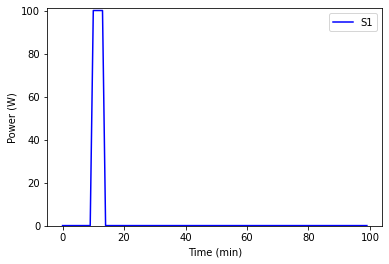

In [4]:



# Return a numpy array starting at 0-end_time with 1 as the increment
x = np.arange(0, end_time, 1)

# Get the a and b constant for this run
a, b = s1_constants()

# Use the s1 function to get the results for each time
y = []
for i in range(len(x)):
   y.append(s1(x[i], a, b))

# Plot the results
plt.plot(x,y,color='blue', label ="S1")
ax = plt.gca()
ax.set_ylim([-0.1, power+1])
ax.legend()
plt.xlabel("Time (min)")
plt.ylabel("Power (W)")

plt.show()

## S2

In [5]:
import random

# Function to create the a and b constant of S2
# Rule: b - a > cutoff
def s2_constants(): 
    a = random.randint(0, start_time)
    b = random.randint(a+cutoff, end_time)
    return a,b

# Given a and b 
# If x < a, return 0 because motor didn't start yet
# If a < x < b, return power since motor is active
# If x > b, return 0 because motor stopped operation
def s2(x,a,b):
 if(x < a): return 0
 if(a<=x<=b): return power 
 else: return 0

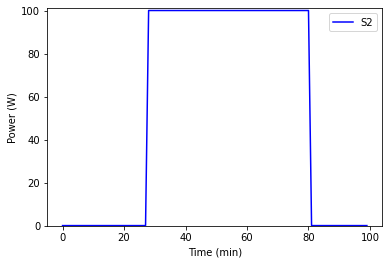

In [6]:
# Return a numpy array starting at 0-end_time with 1 as the increment
x = np.arange(0, end_time, 1)

# Get the a and b constant for this run
a, b = s2_constants()

# Use the s1 function to get the results for each time
y = []
for i in range(len(x)):
   y.append(s2(x[i], a, b))

# Plot the results
plt.plot(x,y,color='blue', label ="S2")
ax = plt.gca()
ax.set_ylim([-0.1, power+1])
ax.legend()
plt.xlabel("Time (min)")
plt.ylabel("Power (W)")

plt.show()

# Create Dataframe using Piecewise Function

https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-a-numpy-array-and-specify-the-index-column-and-column-headers/

In [7]:
lists = []

# Generate a run of S1
def s1_generator():
    # Return a numpy array starting at 0-end_time with 1 as the increment
    x = np.arange(0, end_time, 1)

    # Get the a and b constant for this run
    a, b = s1_constants()

    # Use the s1 function to get the results for each time
    y = []
    for i in range(len(x)):
       y.append(s1(x[i], a, b))
    return y

# Generate a run of s2
def s2_generator():
    # Return a numpy array starting at 0-end_time with 1 as the increment
    x = np.arange(0, end_time, 1)

    # Get the a and b constant for this run
    a, b = s2_constants()

    # Use the s1 function to get the results for each time
    y = []
    for i in range(len(x)):
       y.append(s2(x[i], a, b))
    return y

In [8]:
# For each run, append to lists
# In this case, only s1 was used so that it could be tested
runs = 3
lists = []
for val in range(runs): 
    lists.append(s1_generator())

In [9]:
# Convert the list of lists into a numpy array
numpyArray = np.array(lists)

# Create a dataframe where each row is a run
panda_df = pd.DataFrame(data = numpyArray,
                        columns = x)

## Using Tabular Data with Sktime

https://www.sktime.org/en/stable/examples/loading_data.html 

Sktime isn't able to work with tabular data thus it needs to be converted.

"In a univariate setting, where there are n instances of the series and each univariate timeseries has t timepoints, this would yield a pandas DataFrame with shape (n, t). In practice, this could be used to represent sensors measuring the same signal over time (features) on different machines (instances) or the same economic variable over time (features) for different countries (instances)."

In [10]:
panda_df.shape

(3, 100)

In [11]:
from sktime.datatypes._panel._convert import (
    from_2d_array_to_nested,
    from_nested_to_2d_array,
    is_nested_dataframe,
)

print(f"The tabular data has the shape {panda_df.shape}")

The tabular data has the shape (3, 100)


C:\Users\edwar\anaconda3\envs\tsc\lib\site-packages\sktime\datatypes\_series\_check.py:43: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
C:\Users\edwar\anaconda3\envs\tsc\lib\site-packages\sktime\datatypes\_hierarchical\_check.py:50: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
C:\Users\edwar\anaconda3\envs\tsc\lib\site-packages\sktime\datatypes\_hierarchical\_check.py:51: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_MULTIINDEX_TYPES = (pd.Int64Index, pd.RangeIndex)
C:\Users\edwar\anaconda3

"The from_2d_array_to_nested function makes it easy to convert this to a nested DataFrame."

In [12]:
X_nested = from_2d_array_to_nested(panda_df)
print(f"X_nested is a nested DataFrame: {is_nested_dataframe(X_nested)}")
print(f"The cell contains a {type(X_nested.iloc[0,0])}.")
print(f"The nested DataFrame has shape {X_nested.shape}")
X_nested.head()

X_nested is a nested DataFrame: True
The cell contains a <class 'pandas.core.series.Series'>.
The nested DataFrame has shape (3, 1)


,0
0,0 0 1 0 2 0 3 0 4 0 ....
1,0 0 1 0 2 0 3 0 4 0 ....
2,0 0 1 0 2 0 3 0 4 0 ....


## Plotting Every Run

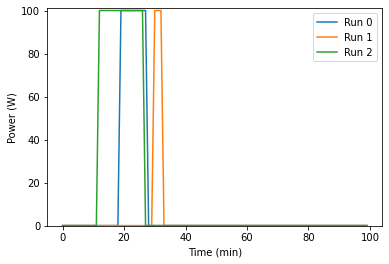

In [13]:
# X-axis: df.columns becuase each column is a time value
# Y-axis: df.iloc[row, :] because each value in the row is the current power value at time x 
for i in range (panda_df.shape[0]):
    plt.plot(panda_df.columns,panda_df.iloc[i,:], label = "Run "+str(i))

ax = plt.gca()
ax.set_ylim([-0.1, power+1])
ax.legend()
plt.xlabel("Time (min)")
plt.ylabel("Power (W)")

plt.show()   

# S3

## Pseudo Code


Tc : Operation time at constant load  
To: Time deenergized and at rest  

1) Random start time   
2) End of of first cyclecycle = Starttime + Tc   
3) Start time of next cycle = Startime + Tc + To  
4) End time of next cycle = startime + Tc + To + Tc   

Assumptions:
Tc must operate for at least 10 minutes
To must have a break of at least 10 minutes

In [14]:
# time_started: when does motor start?
# tc: operation time at constant load
# to: time deenergized and at rest
def s3_constants(): 
    time_started = random.randint(0, start_time)
    tc = random.randint(10, 30)
    to =  random.randint(10, 30)
    return time_started, tc, to

# Given a and b 
# If x < time_started, return 0 because motor didn't start yet
# If time_started < x < time_started + tc, return power since motor is active
# If time_started + tc < x < time_started + tc + to, return 0 since cycle 1 finished and cycle 2 not started yet
# If time_started + tc + to < x < time_started + tc + to + tc, return power since in cycle 2
# Else, return 0 since since both cycles complete
def s3(x, time_started,tc,to, power):
 if(x < time_started): return 0
 if(time_started < x < time_started+tc): return power
 if(time_started+tc < x < time_started+tc+to): return 0
 if(time_started+tc+to < x < time_started+tc+to+tc): return power
 else: return 0

lists = []

# Generate a run of S3
def s3_generator(power):
    # Return a numpy array starting at 0-end_time with 1 as the increment
    x = np.arange(0, end_time, 1)

    # Get the a and b constant for this run
    time_started, tc, to = s3_constants()

    # Use the s1 function to get the results for each time
    y = []
    for i in range(len(x)):
       y.append(s3(x[i], time_started, tc, to, power))
    return y


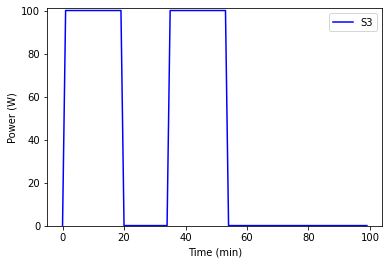

In [15]:
# Plot the results
x = np.arange(0, end_time, 1)
y = s3_generator(100)

plt.plot(x,y,color='blue', label ="S3")
ax = plt.gca()
ax.set_ylim([-0.1, power+1])
ax.legend()
plt.xlabel("Time (min)")
plt.ylabel("Power (W)")

plt.show()

# S4

## Notes

Graphing a polynomial based on the roots is done through using numpy.polynomial.polynomial.Polynomial.fromroots([roots]). This then returns a series with the specified roots

In [16]:
from numpy.polynomial import polynomial as P

p = P.Polynomial.fromroots([-3,3])

Printing p shows what function was created

In [17]:
p

Polynomial([-9.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [18]:
p.roots()

array([-3.,  3.])

In [19]:
p.coef

array([-9.,  0.,  1.])

In [20]:
p.degree()

2

p.linspace() returns x and y for the polynomial in the given domain. The default domain is [-1, 1]

In [21]:
x, y = p.linspace()

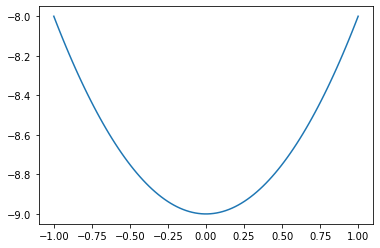

In [22]:
plt.plot(x,y)

Also possible to call the function p and pass in an x value. Shows that return polynomial is functionally equivalent to f(x) in mathematics

In [23]:
print(p(2))

-5.0


## Finding max values of poly

In [24]:
c, b, a = p.coef

In [25]:
x0 = -b/(2*a)

In [26]:
print(x0)
print(p(x0))

-0.0
-9.0


# Flipping the graph 

Results in same roots but correct looking graph

In [27]:
flipped = -p

In [28]:
flipped

Polynomial([ 9., -0., -1.], domain=[-1.,  1.], window=[-1.,  1.])

In [29]:
x, y = flipped.linspace()

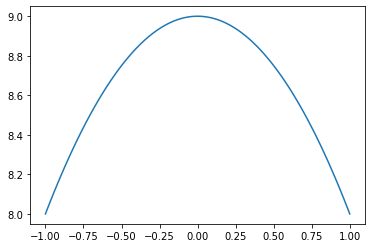

In [30]:
plt.plot(x,y)

## Pseudo Code

S4 is essentially a flipped polynomial with a line graph after a certain amount of time.

1) Random time_started  
2) Create polynomial based on root_1 and root_2 such that 15 < root_2 - root_1 < 20 (refer to important note below)
3) Find x0, y0 (coordinates of max)   
4) poly_time_ended = random number from x0 - root_2 that defines when the line graph starts  
5) Line graph defined such that y=polynomial(poly_time_ended)  
6) Operate for Tc time  

Important Notes:
root_2 - root_1 = 20 then max height becomes 100
root_2 - root_1 = 15 then max height becomes ~55

In [31]:
from numpy.polynomial import polynomial as P
# time_started: when does motor start?
# root_1 first root of quadratic function
# root_2 second root of quadratic. Note root_2 = root_1 + (value between 15 - 20) 
# x0,y0 is coordinates of max height of polynomial
# poly_time_ended is a x value from the (halfway point of x0 and root_2) and (3/4 point of x0 and root_2)
# tc: operation time at constant load
def s4_constants(): 
    time_started = random.randint(0, start_time)
    root_1 = time_started
    root_2 = random.randint(root_1+15, root_1+20)
    
    p = P.Polynomial.fromroots([root_1,root_2])
    flipped_p = -p
    
    c, b, a = flipped_p.coef
    x0 = -b/(2*a)
    y0 = flipped_p(x0)
    
    
    poly_time_ended = random.randint(int(x0 + (root_2 - x0) / 1.5), int(root_2 - (root_2 - x0)/4))
    y_line = flipped_p(poly_time_ended)
    
    tc = random.randint(10, 30)
    return time_started, flipped_p, x0, y0, poly_time_ended,  y_line, tc

# If x < time_started, motor didn't start yet 
# If time_started < x < poly_time_ended, currently in polynomial mode thus return poly(x)
# If poly_time_ended < x < poly_time_ended + tc, currently in line mode at where y = y_line 
def s4(x, time_started, flipped_p, x0, y0, poly_time_ended,  y_line, tc):
 if(x < time_started): return 0
 if(time_started < x <= poly_time_ended): return flipped_p(x)
 if(poly_time_ended <= x < poly_time_ended + tc): return y_line
 else: return 0

lists = []

# Generate a run of S4
def s4_generator():
    # Return a numpy array starting at 0-end_time with 1 as the increment
    x = np.arange(0, end_time, 1)

    # Get the a and b constant for this run
    time_started, flipped_p, x0, y0, poly_time_ended,  y_line, tc= s4_constants()

    # Use the s1 function to get the results for each time
    y = []
    for i in range(len(x)):
       y.append(s4(x[i],time_started, flipped_p, x0, y0, poly_time_ended,  y_line, tc))
    return y


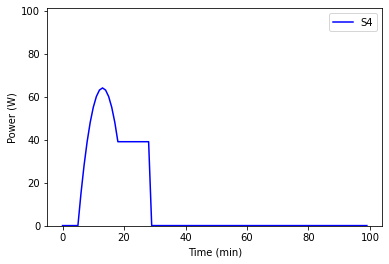

In [32]:
# Plot the results
x = np.arange(0, end_time, 1)
y = s4_generator()

plt.plot(x,y,color='blue', label ="S4")
ax = plt.gca()
ax.set_ylim([-0.1, power+1])
ax.legend()
plt.xlabel("Time (min)")
plt.ylabel("Power (W)")

plt.show()